# Loan Application Status Prediction

In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [340]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [341]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [343]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [344]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [345]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [346]:
df.shape

(614, 13)

In [347]:
df.set_index('Loan_ID', inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [348]:
df['Gender']=df['Gender'].map({"Female":1,"Male":0})
df['Married']=df['Married'].map({"Yes":1,"No":0})
df['Education']=df['Education'].map({"Graduate":1,"Not Graduate":0})
df['Self_Employed']=df['Self_Employed'].map({"Yes":1,"No":0})
df['Loan_Status']=df['Loan_Status'].map({"Y":1,"N":0})

In [349]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [350]:
df['Property_Area']=df['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})

In [351]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [352]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [353]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1


In [354]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [355]:
df.describe()      # statistical analysis

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.912052,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [356]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)
#cross-tabulation (also known as contingency table) between the 'Credit_History' column and the 'Loan_Status' column

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


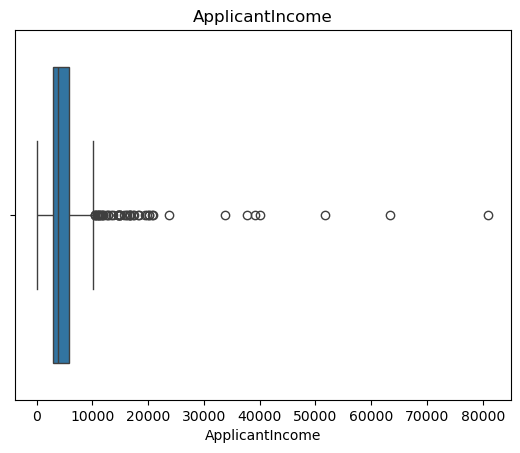

In [357]:
import seaborn as sns

sns.boxplot(data=df, x='ApplicantIncome')
plt.title('ApplicantIncome')
plt.show()

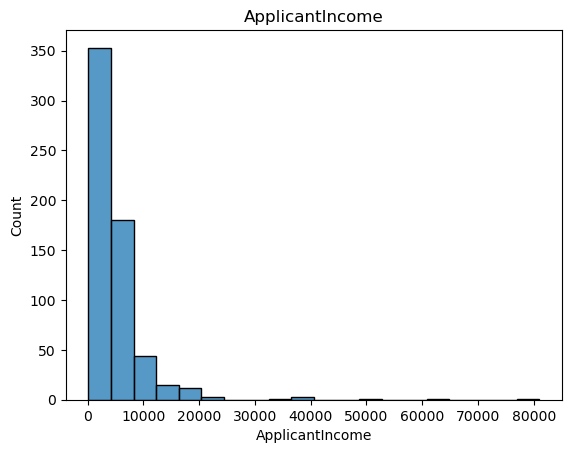

In [358]:
import seaborn as sns

sns.histplot(data=df, x='ApplicantIncome',bins=20)
plt.title('ApplicantIncome')
plt.show()

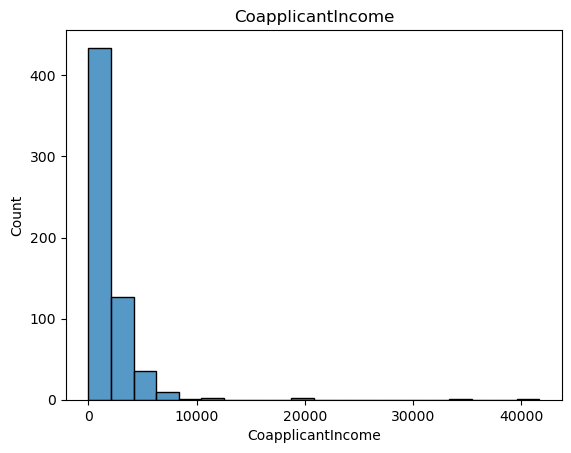

In [359]:
import seaborn as sns

sns.histplot(data=df, x='CoapplicantIncome',bins=20)
plt.title('CoapplicantIncome')
plt.show()

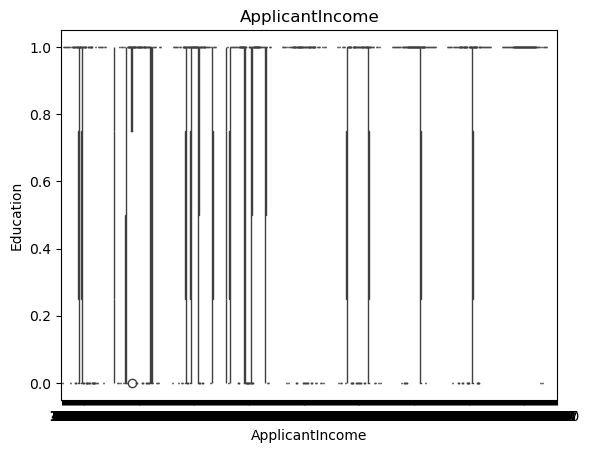

In [360]:
import seaborn as sns

sns.boxplot(data=df, x='ApplicantIncome',y ='Education')
plt.title('ApplicantIncome')
plt.show()

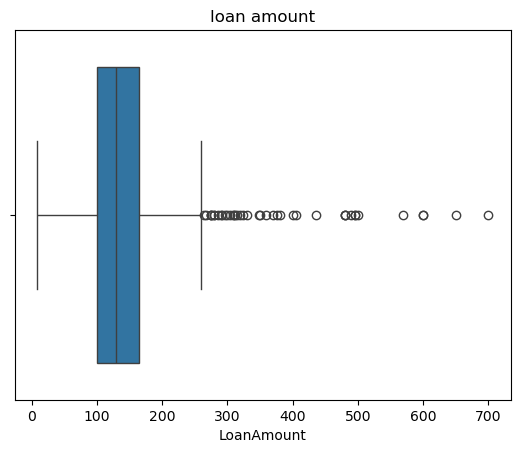

In [361]:
import seaborn as sns

sns.boxplot(data=df, x='LoanAmount')
plt.title('loan amount')
plt.show()

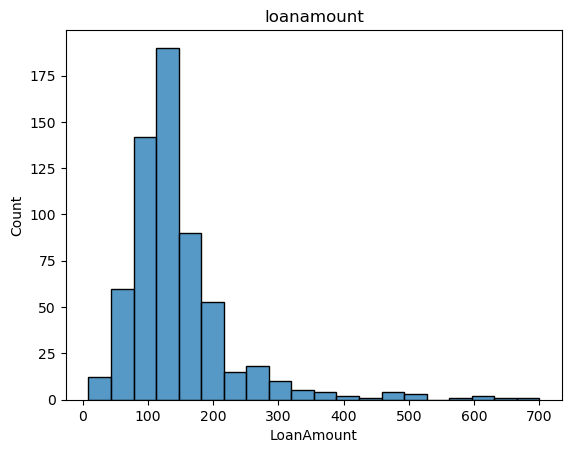

In [362]:
import seaborn as sns

sns.histplot(data=df, x='LoanAmount',bins=20)
plt.title('loanamount')
plt.show()

In [363]:
#Z score
from scipy.stats import zscore
out_features=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]
z=np.abs(zscore(out_features))    #
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.273231,0.411733,0.107989,0.674519
LP001003,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.273231,0.411733,1.335861,1.482537
LP001005,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.273231,0.411733,0.107989,0.674519
LP001006,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.273231,0.411733,0.107989,0.674519
LP001008,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.273231,0.411733,0.107989,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.273231,0.411733,1.335861,0.674519
LP002979,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.522836,0.411733,1.335861,0.674519
LP002983,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.273231,0.411733,0.107989,0.674519


In [364]:
np.where(z>3)


(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [365]:
df1=df[(z<3).all(axis=1)]
df1.shape

(577, 12)

In [366]:
print("old dataframe: ",df.shape[0])
print("new dataframe: ",df1.shape[0])

old dataframe:  614
new dataframe:  577


In [367]:
print("data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage: 6.026058631921824


In [368]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1


In [369]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.378997,-0.188162,0.045696,0.006207,-0.026943,-0.190543,-0.159957,0.104983,-0.013172,-0.100914,-0.017408
Married,-0.378997,1.000000,0.329900,-0.024817,-0.015779,-0.008567,0.237322,0.165147,-0.127348,0.019308,-0.018270,0.089026
Dependents,-0.188162,0.329900,1.000000,-0.069814,0.044543,0.077227,-0.026220,0.135610,-0.087389,-0.020288,-0.016903,0.017872
Education,0.045696,-0.024817,-0.069814,1.000000,0.007139,0.166400,0.037780,0.146598,0.090523,0.075217,-0.073216,0.092658
Self_Employed,0.006207,-0.015779,0.044543,0.007139,1.000000,0.250665,-0.039572,0.121892,-0.032914,-0.016390,-0.001151,-0.026525
ApplicantIncome,-0.026943,-0.008567,0.077227,0.166400,0.250665,1.000000,-0.220975,0.442394,-0.052101,0.036664,0.030986,-0.005003
CoapplicantIncome,-0.190543,0.237322,-0.026220,0.037780,-0.039572,-0.220975,1.000000,0.309479,-0.058726,-0.011102,0.049180,0.045009
LoanAmount,-0.159957,0.165147,0.135610,0.146598,0.121892,0.442394,0.309479,1.000000,0.037302,0.008541,0.037847,-0.035289
Loan_Amount_Term,0.104983,-0.127348,-0.087389,0.090523,-0.032914,-0.052101,-0.058726,0.037302,1.000000,0.027392,-0.047147,-0.020291
Credit_History,-0.013172,0.019308,-0.020288,0.075217,-0.016390,0.036664,-0.011102,0.008541,0.027392,1.000000,-0.034919,0.560936


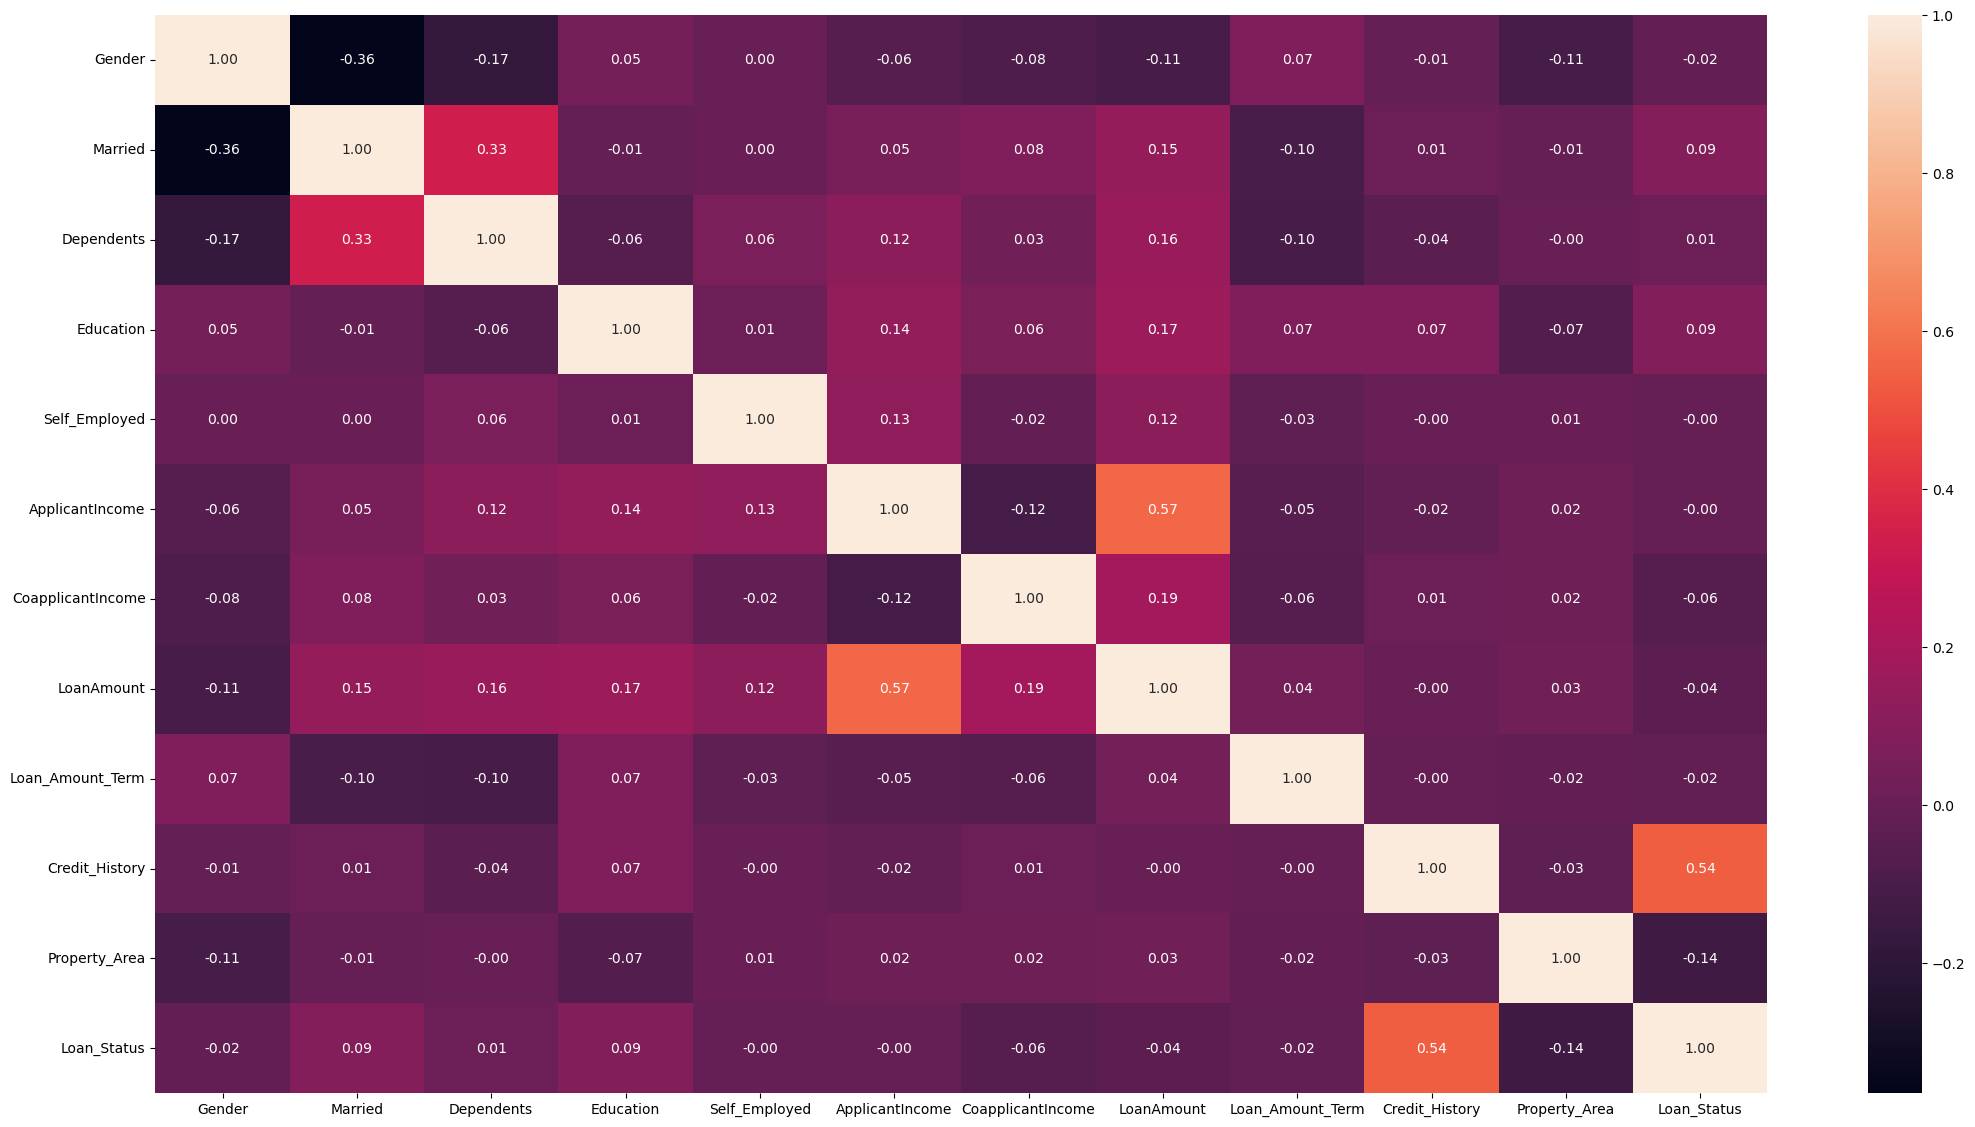

In [370]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.show()

In [371]:
df.corr().Loan_Status.sort_values()

Property_Area       -0.137545
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
Gender              -0.017987
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Education            0.085884
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

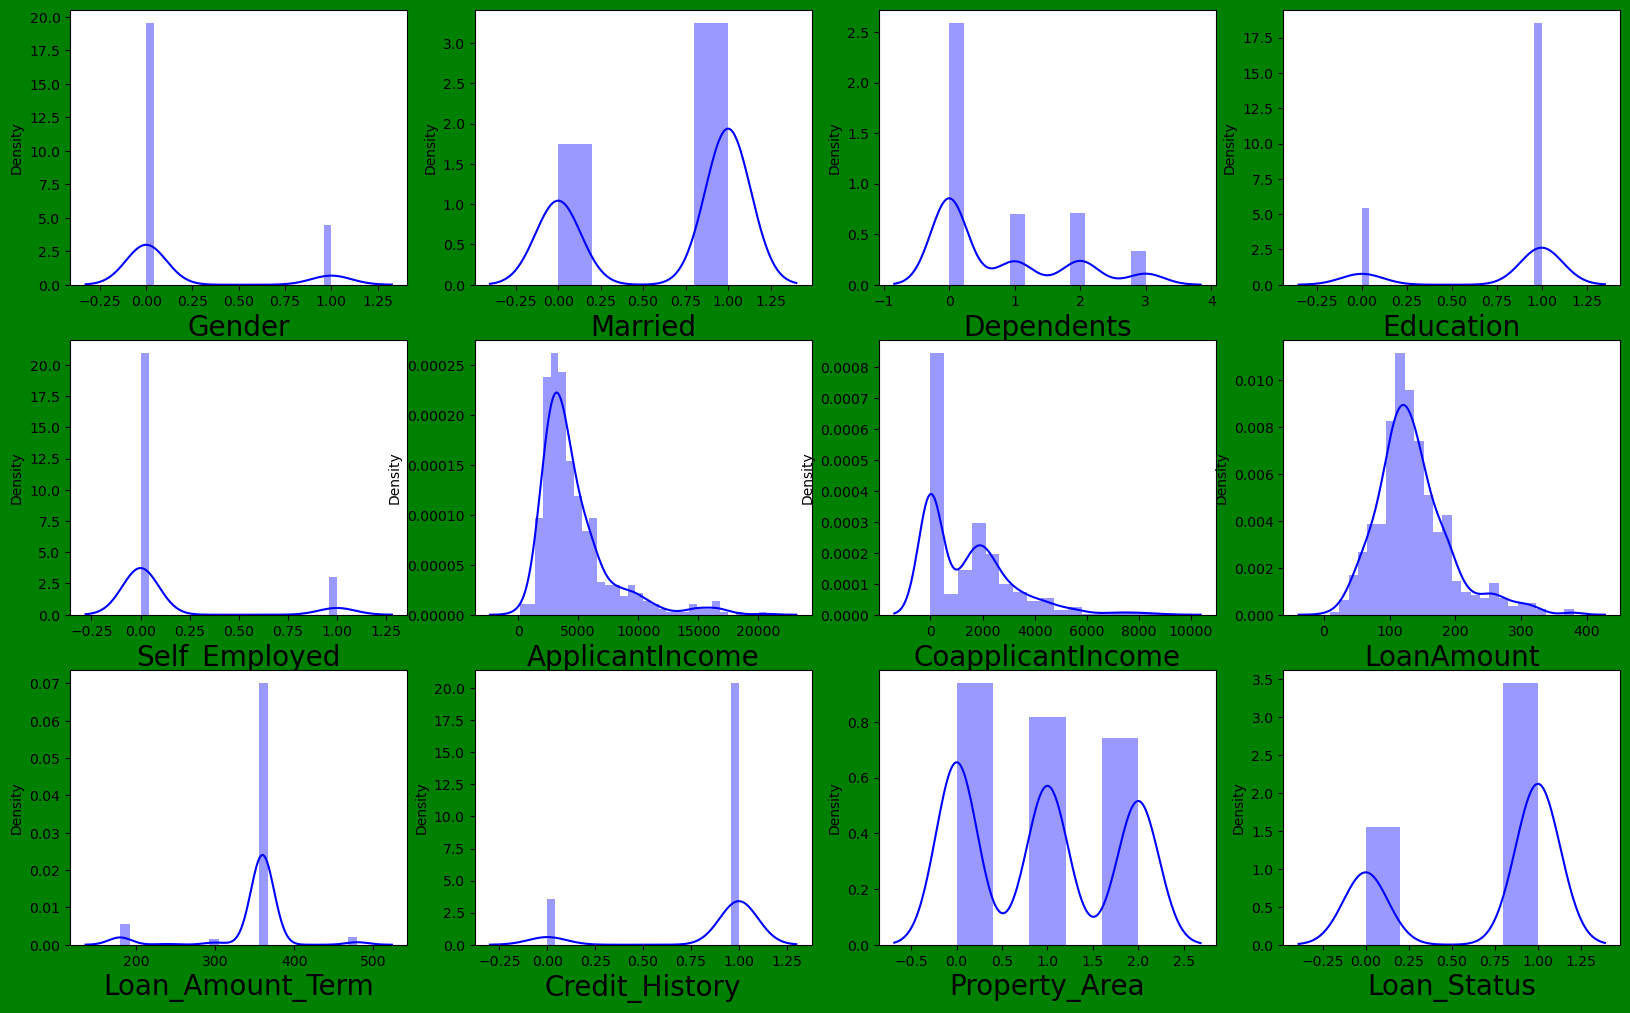

In [372]:
#Checking the skewness of the data
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [373]:
df1.skew()

Gender               1.622920
Married             -0.630211
Dependents           1.052106
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area        0.147713
Loan_Status         -0.822635
dtype: float64

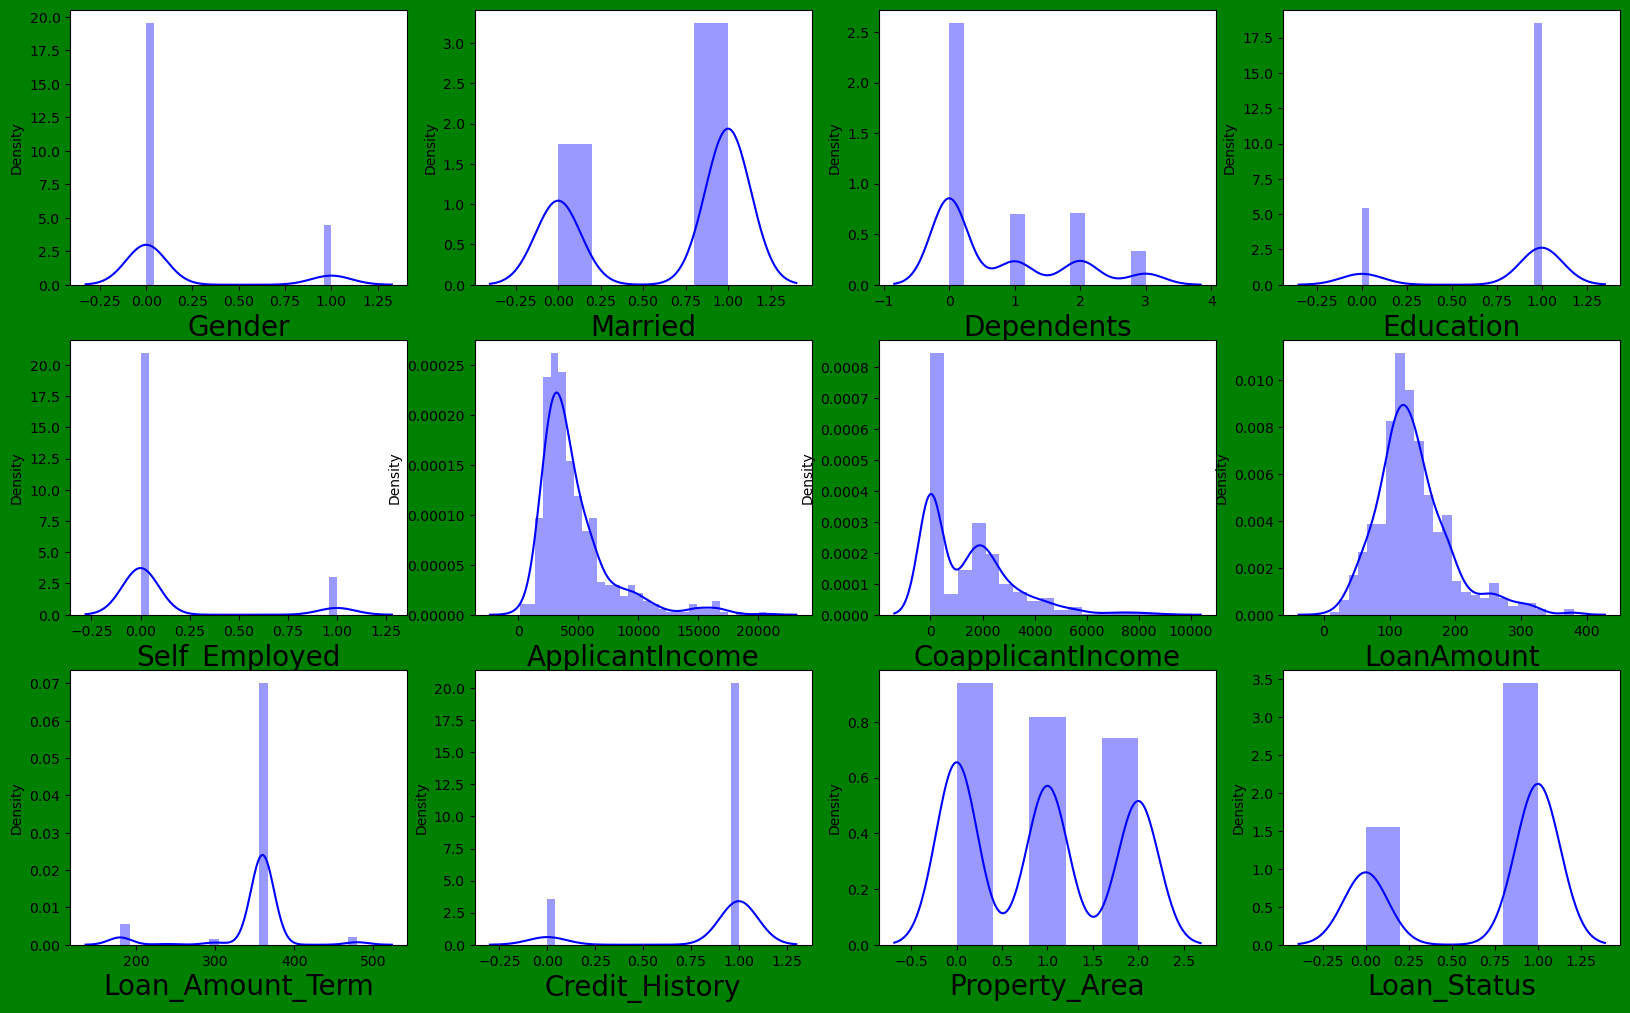

In [374]:
#Checking the skewness of the data
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [375]:
# Featuring the x and y
x=df1.drop(['Loan_Status','Gender'],axis=1)
y=df1['Loan_Status']
print("feature dimensions",x.shape)
print("label dimension",y.shape)

feature dimensions (577, 10)
label dimension (577,)


In [376]:
# Feature Scaling using Standard Scalarisation
#for evaluation of the data

In [377]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Apply log transformation to your data
X_log_transformed = np.log1p(x)  # Adding 1 to handle zero values

# Use RobustScaler for scaling
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X_log_transformed),columns=x.columns)
x

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.362511,-0.775143,0.541961,-0.380580,0.688861,-1.127469,0.369286,0.259011,0.418513,0.306877
1,0.733939,0.573759,0.541961,-0.380580,0.249082,0.780679,0.055093,0.259011,0.418513,1.192375
2,0.733939,-0.775143,0.541961,2.627567,-0.514859,-1.127469,-1.487655,0.259011,0.418513,0.306877
3,0.733939,-0.775143,-1.845150,-0.380580,-0.784651,0.897159,-0.095673,0.259011,0.418513,0.306877
4,-1.362511,-0.775143,0.541961,-0.380580,0.734818,-1.127469,0.281199,0.259011,0.418513,0.306877
...,...,...,...,...,...,...,...,...,...,...
572,-1.362511,-0.775143,0.541961,-0.380580,-0.575974,-1.127469,-1.318164,0.259011,0.418513,1.192375
573,0.733939,1.922662,0.541961,-0.380580,0.050933,-1.127469,-2.644201,-3.414687,0.418513,1.192375
574,0.733939,0.573759,0.541961,-0.380580,1.269687,0.302441,1.650597,0.259011,0.418513,0.306877
575,0.733939,1.362817,0.541961,-0.380580,1.157006,-1.127469,0.942022,0.259011,0.418513,0.306877


# Modelling
for finding the best random state

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [379]:
# finding the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   # to find difference between the predicted and actual value
    if acc>maxacc: 
        maxacc=acc
        maxrs=i
print("Maximum score is",maxacc,"on Random state",maxrs)

Maximum score is 0.468507132033008 on Random state 86


In [380]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=86)

In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [391]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_LR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score:  0.468507132033008
R2 score on training data:  27.87771984460996
Mean Absolute Error 0.26907036196147927
Mean Squared Error 0.11489697518972003
Root mean squared Error 0.3389645633244278


In [382]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_RFR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.4552111841100078
R2 score on training data:  88.05724014336917
Mean Absolute Error 0.25885057471264367
Mean Squared Error 0.11777126436781607
Root mean squared Error 0.343178181660513


In [383]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_knn))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.27688311688311695
R2 score on training data:  39.752688172042994
Mean Absolute Error 0.27586206896551724
Mean Squared Error 0.1563218390804598
Root mean squared Error 0.39537556712632077


In [384]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_GBR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score:  0.36523529831793466
R2 score on training data:  62.96301771615166
Mean Absolute Error 0.27935227366144033
Mean Squared Error 0.13722205616690178
Root mean squared Error 0.370434955379351


In [385]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_ls))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error',mean_squared_error(y_test,pred_ls))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 score:  -0.00032637046211680953
R2 score on training data:  0.0
Mean Absolute Error 0.42926613616268783
Mean Squared Error 0.21624838468339794
Root mean squared Error 0.4650251441410431


In [386]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_rd))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error',mean_squared_error(y_test,pred_rd))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score:  0.46812502533107125
R2 score on training data:  27.877534072837072
Mean Absolute Error 0.269473873478088
Mean Squared Error 0.11497957818761195
Root mean squared Error 0.3390863874997225


In [387]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_svr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score:  0.45514007557588354
R2 score on training data:  44.96786370982748
Mean Absolute Error 0.21395036270029089
Mean Squared Error 0.11778663645646197
Root mean squared Error 0.3432005775875996


In [388]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_etr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score:  0.4048136592818947
R2 score on training data:  100.0
Mean Absolute Error 0.2438505747126437
Mean Squared Error 0.12866609195402298
Root mean squared Error 0.35870056029231817


In [399]:
from sklearn.tree import DecisionTreeRegressor 

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_dtr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  -0.08999236058059568
R2 score on training data:  100.0
Mean Absolute Error 0.23563218390804597
Mean Squared Error 0.23563218390804597
Root mean squared Error 0.48541959571905


# Cross Validation score

In [392]:
from sklearn.model_selection import cross_val_score
score =cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.36265642 0.15523269 0.2745749  0.43412499 0.3377033 ]
0.31285845791486044
Difference between R2 score and cross validation score:  15.564867411814753


In [393]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.28661738 0.11299472 0.29377617 0.40185625 0.30172367]
0.27939363759638924
Difference between R2 score and cross validation score:  17.58175465136186


In [394]:
 score2 =cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_knn)-score2.mean())*100)

[ 0.19035631 -0.03111111  0.07861446  0.3215      0.21580042]
0.15503201457538818
Difference between R2 score and cross validation score:  12.185110230772878


In [395]:
score3 =cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.22364919 0.03946705 0.22472894 0.30194682 0.28398658]
0.21475571641141888
Difference between R2 score and cross validation score:  5.237684040307422


In [396]:
score4 =cross_val_score(ls,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_ls)-score4.mean())*100)

[-4.73851196e-03 -1.04564830e-07 -7.93540899e-03 -2.54499675e-04
 -9.47559389e-04]
-0.002775216915796319
Difference between R2 score and cross validation score:  0.24488464536795096


In [397]:
score5 =cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.36257142 0.15558652 0.27481748 0.4341064  0.3379057 ]
0.3129975032078901
Difference between R2 score and cross validation score:  15.512752212318116


In [400]:
score6 =cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_dtr)-score6.mean())*100)

[-0.12021312 -0.49027778 -0.2123494  -0.27321429 -0.1954262 ]
-0.25829615534434797
Difference between R2 score and cross validation score:  16.830379476375228


In [401]:
score7 =cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.21729823 0.02266817 0.22918098 0.37756782 0.26026609]
0.2213962569542697
Difference between R2 score and cross validation score:  23.374381862161382


In [402]:
score8 =cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_etr)-score8.mean())*100)

[ 0.15809417 -0.01858069  0.09309337  0.326675    0.13919751]
0.139695871348242
Difference between R2 score and cross validation score:  26.51177879336527


In [403]:
from sklearn.model_selection import GridSearchCV

In [404]:
# Hyper Parameter Tunning
param={'alpha':[1.0,0.05,0.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[False,True],'random_state':[1,4,10,20]}
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [405]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [406]:
Model=Ridge(alpha=0.05,fit_intercept=True,positive=False,random_state=1,solver='lsqr')

In [407]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('r2_score: ',r2_score(y_test,pred))
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))      

r2_score:  0.468462732426295
Mean Absolute error: 0.2691269129472186
Mean Squared error: 0.11490657340037984
Root Mean Squared Error:  0.33897872116163846


In [408]:
import joblib
import pickle
filename='loan.pkl'
pickle.dump(Model,open(filename,'wb'))

In [409]:
import pickle 
loaded_model=pickle.load(open('loan.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

46.8462732426295
